<a href="https://colab.research.google.com/github/abhisheknagpure8/airbnb-bookings-analysis/blob/main/EDA_Project_AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnb Bookings Analysis 



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

Airbnb is an American Company since 2007, it is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales.

We have our dataset from AirBnb based on NY. NY is amongst the most expensive places to live in USA. We would like to perform an in-depth analysis on one of the most densely populated cities of world. Our dataset is feature rich containing, location with co-ordinates, prices, host name, room types, availability throughout season. From these features we’ve tried to extract information like most expensive places to live in NY, is location really varies with occupancy rate, what type of room people tends to choose most, is there any particular season for tourists or locale when we can follow a surge in prices or occupancy rate of properties etc.

We have performed data wrangling, handled n/a values, created new feature from last reviewed date. Also, we’ve plotted location wise data and distribution of our numerical features, performed univariate and bivariate analysis with multiple dependencies.

# **GitHub Link -**

https://github.com/abhisheknagpure8/airbnb-bookings-analysis.git

# **Problem Statement**


The problem this capstone project aims at solving is predicting where a newly registered Airbnb user will book his/her first travel experience. By analyzing a variety of data such as user informations, country information and user browsing session records, the project aims at coming up with a model that could accurately detect where a user would book his/her first experience from an array of 34000+ cities across 190+ countries.



#### **Define Your Business Objective?**

Answer Here: -
#####Our goal is to provide the ultimate service for guests, anticipating their needs and going above and beyond—just like a good Host

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [48]:
# Import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [49]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Modules/Module 1-Python/Projects/{Airbnb Booking Analysis} - Abhishek Nagpure/Airbnb NYC 2019.csv')

### Dataset First View

In [51]:
df.shape

(48895, 16)

In [52]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [53]:
# Dataset Rows & Columns count
rows = len(df.axes[0])
rows

48895

In [54]:
cols = len(df.axes[1])
cols

16

### Dataset Information

In [55]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [56]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [57]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

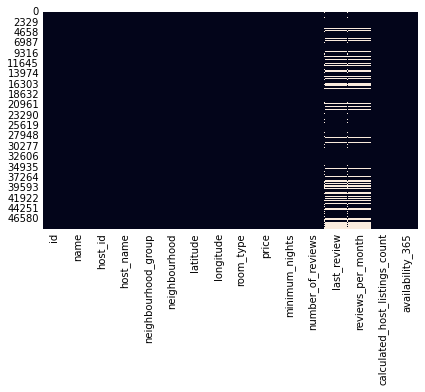

In [58]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here: -
#####Airbnb became one of a kind service that is used and recognized by the whole world.This dataset has around 48,895 observations in it with 16 columns and it is a mix between categorical and numeric values.The goal is to understand and take steps to provide the better quality rooms and good pricing for the listings.There are no duplicate values but have null values in the dataset.

## ***2. Understanding Your Variables***

In [59]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [60]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 



* **id :** unique id identifying airbnb listing
* **name :** name of hotel or a room
* **host_id :** an id identifying an airbnb host
* **host_name :** name under whom host is registered
* **neighbourhood_group :**a group of area
* **neighbourhood :** area fall under neighbourhood group
* **latitude  :** coordibate of listing
* **longitude :**coordibate of listing
* **room_type :** category of rooms
* **price :** price of listing
* **minimum_nights :**the minimum nights required to stay in a single visit
* **number_of_reviews :**total count of reviews given by visitors
* **last_review :**date of last review given
* **reviews_per_month :**rate of reviews given per month
* **calculated_host_listings_count :**total no of listing registered under the host
* **availability_365 :**the number of days for which a host is available in a year




### Check Unique Values for each variable.

In [61]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


## 3. ***Data Wrangling***

### Data Wrangling Code


Handling Null Values

In [62]:
# Check Unique Values for each variable.
df.isnull().columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [63]:
#Missing value in percentage.
Total = df.isnull().sum().sort_values(ascending = False)
missing_values= round(((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending = False),2)

#Missing_value data frame.
missing_value_per = pd.concat([Total,missing_values],axis = 1,keys = ['Total','Percentage(%)'],sort = False).sort_values('Total',ascending=False)
missing_value_per

,Total,Percentage(%)
last_review,10052,20.56
reviews_per_month,10052,20.56
host_name,21,0.04
name,16,0.03
id,0,0.00
host_id,0,0.00
neighbourhood_group,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00


In [64]:
#Impute Null Values with 0 in reviews_per_month
df.reviews_per_month.fillna(value = 0, inplace = True)

In [65]:
#Impute Null Values with 0 in last_review
df['last_review'].fillna(value = 0, inplace = True)

As there were more number of null values of reviews_per_month and last_review we have imputet that null values with zeroes we will drop both the columns.   

In [66]:
new_df = df[['id','name','host_id','host_name','neighbourhood_group','latitude','longitude','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
new_df.head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,40.64749,-73.97237,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,40.75362,-73.98377,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,40.80902,-73.94190,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,40.68514,-73.95976,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,40.79851,-73.94399,East Harlem,Entire home/apt,80,10,9,1,0


In [67]:
# Write your code to make your dataset analysis ready.
hosts_areas = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


In [68]:
areas_reviews = new_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


### What all manipulations have you done and insights you found?

Firstly, we calculated the total number of null values in each columns and also calculated the percentage also.We go to know that there were having the data with more null values in reviews_per_month and last_review columns so we imputed with 0 value.Despite being more number of null value i thought to drop it from the dataset.

Also host_name having 21 null values i am going to impute those values because it is a categorical column and it will be not used in analysis

We have used the group by operation on host name and neighbourhood group and counted all the calculate_host_listings_count which shows the count for neighbourhood groups for each hosts.As we can see most number of listings are from Manhattan created Sonder (NYC), Blueground, Michael, David.Then we have group by the neighbourhood groups on the basis of number of reviews given to them.On that basis,the next person can see the reviews and can book the hotel in that neighbourhood group. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Univariate Analysis)

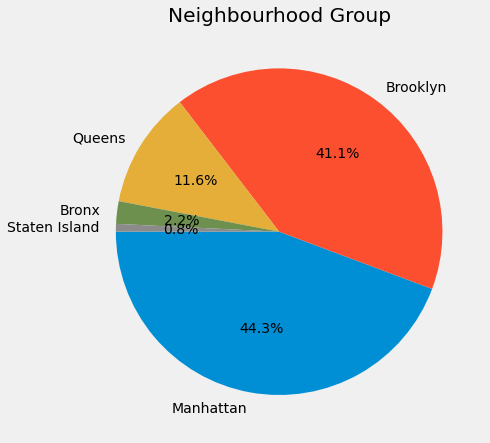

In [69]:
# Chart - 1 visualization code
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(new_df.neighbourhood_group.value_counts(), labels=new_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: -
#####A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors.Where differenet percentage comparison comes into action pie chart is used frequently.*To* see the listings where are the more number of neighbourhood group are present

##### 2. What is/are the insight(s) found from the chart?

Answer Here: - 
######The pie chart above shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels. We also know that from this map of Neighborhood Group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: -
#####Here shows the more number of hotels in a neighbourhood group .It will help the people to find the hotels very easily using this simple pie chart because it shows the clear number of percentage where the more number of hotels are present.It will lead to the positive growth. 

#### Chart - 2 neighbourhood_group vs number_of_reviews (Bivariate analysis)

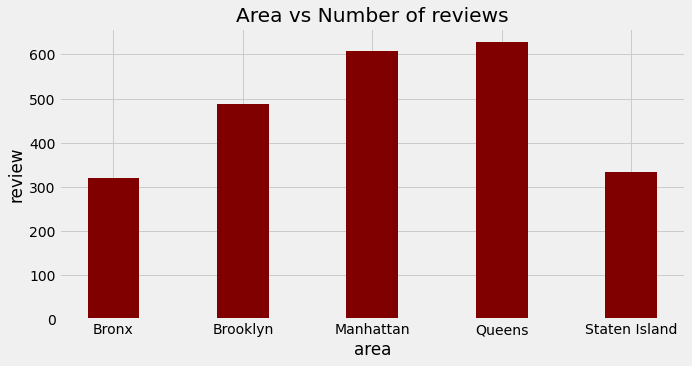

In [70]:
# Chart - 2 visualization code
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='maroon',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [71]:
price_area = new_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(10)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9
5,15,19
6,16,43
7,18,1
8,19,76
9,20,116


##### 1. Why did you pick the specific chart?

Answer Here: -  
#####Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: -
#####There are the some neighbourhood groups who have got more number of reviews,especially Queens and Manhattan area.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: -
#####Yes, the data of number of reviews for every neighbourhood group will help.If any person have plan to book a hotel in a neighbourhood group then number of reviews will be very important part will booking. 

#### Chart - 3  Bar chart on count of room_type (Univariate)

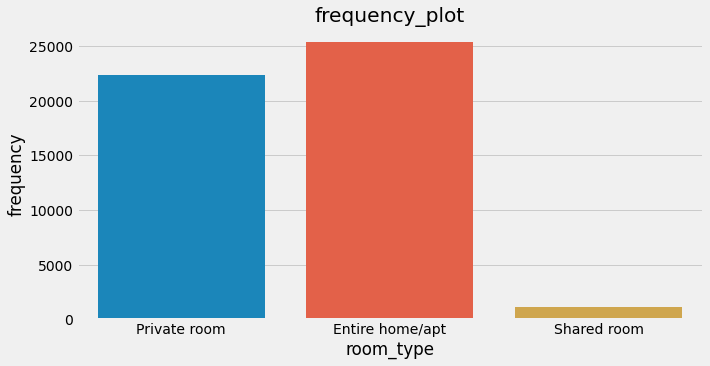

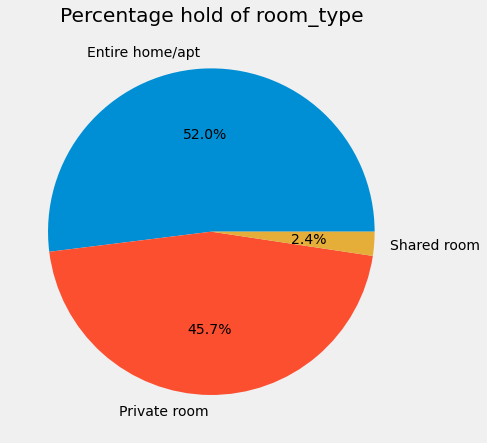

In [72]:
#count_plot
plt.figure(figsize=(10,5))
snsn= sns.countplot(x='room_type',data=df)
snsn.set_title('frequency_plot')
snsn.set_ylabel('frequency')
snsn.set_xlabel('room_type')
plt.show() 


plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Percentage hold of room_type")
g = plt.pie(new_df.room_type.value_counts(), labels=new_df.room_type.value_counts().index,autopct='%1.1f%%', startangle=0)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: -
#####I pick this chart because it will show the count of diferent types room_type

##### 2. What is/are the insight(s) found from the chart?

Answer Here: -
#####People mostly prefered to take whole apartment on rent followed by Private room. Very few people prefered to have shared rooms.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: -
#####It will show the people prefer which type of room_type. Shared room is also showing,if another person is looking for taking a shared_room can view bar chart and from that they can book.

#### Chart - 4 (Multivariate Analysis)

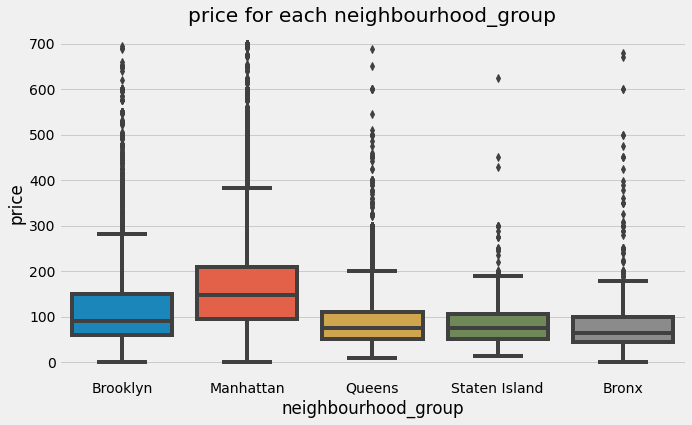

In [73]:
# Chart - 3 visualization code
plt.style.use('fivethirtyeight')

price_500 = new_df[new_df.price <700]
plt.figure(figsize=(10,6))
plt.title("price for each neighbourhood_group")
sns.boxplot(y= 'price',x= 'neighbourhood_group',data=price_500)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: -
#####I pick this chart because this chart shows shows the prices of different neighbourhood groups and To check the prices of the neighbourhood groups

##### 2. What is/are the insight(s) found from the chart?

Answer Here: -
#####We can see that Manhattam is the most expensive destination immediately followed by Brooklyn.Queens, staten island and Bronx, are having price range less as compaired toother two.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: -
#####It will be helpful to people to see the prices of different neighbourhood groups and itwill help a lot while booking a hotel in a certain area.

#### Chart - 5 Relationship between room_type and neighbourhood_group

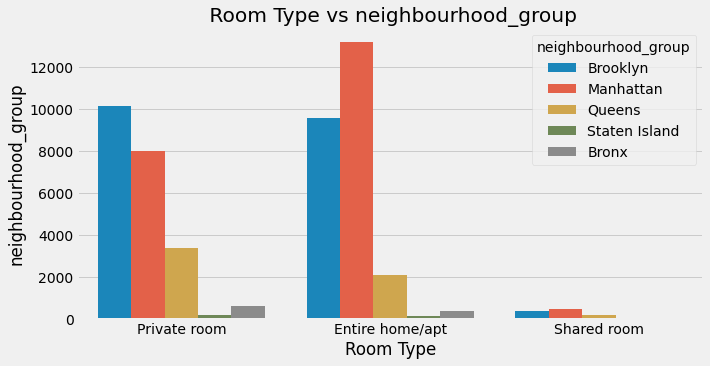

In [74]:
plt.figure(figsize = (10,5))
ax_11 = sns.countplot(x='room_type',hue='neighbourhood_group',data=df)
ax_11.set_title(' Room Type vs neighbourhood_group')
ax_11.set_xlabel('Room Type')
ax_11.set_ylabel("neighbourhood_group")
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there are 2850 customers which are not churned which is 85.5% of the whole customers data given in the dataset. In other hand, 483 customers are churned which is 14.%% of the whold customers data given in the dataset.


14.5% customers are churned which might look like a small number, but once upon a time the 14.5% was 1.45% which has grown upto 14.5%. So, Immediate action should be taken.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Customer churn is often referred to as customer attrition, or customer defection which is the rate at which the customers are lost. Telecom companies often use customer churn as a key business metrics to predict the number of customers that will leave a telecom service provider. Churn is significant in the telecommunication industry because it directly affects the competitiveness of the service provider.

It's easy to loss customers but too difficult to aquire one. One churned cutomer will make 3-4 customers away those might be acquired by your teleservice provider 
with "POWER OF WORDS".

When Jio provided free internnet services to everyone, and started acquiring maximum number of customers, so cutomer churn rate for other teleservice providers increased and customers from other teleservice providers those who converted to JIO spread the benefit of JIO to their relatives and friends and they also converted too easily. So, "POWER OF WORDS" also comes into action that wrong and bad reviews spread first. 

#### Chart - 6 (Bivariate Analysis)

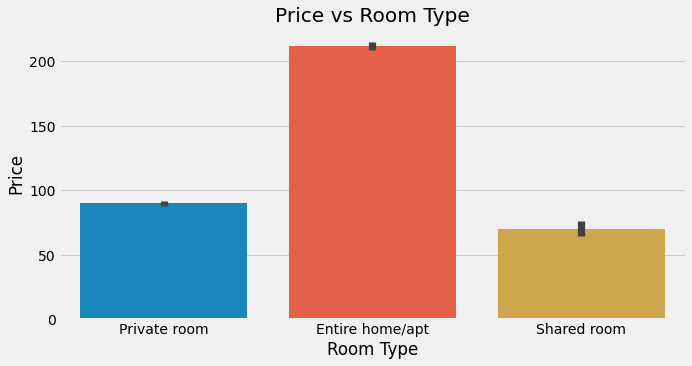

In [75]:
# Chart - 6 visualization code
plt.figure(figsize = (10,5))
ax_8 = sns.barplot(y= 'price', x= 'room_type',data=new_df)
ax_8.set_title('Price vs Room Type')
ax_8.set_xlabel('Room Type')
ax_8.set_ylabel("Price")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.
#####I pick this chart because chart show the price of the different category room type and it wil be helpful to person who will look to book a room of any type.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: -
#####We can see that most of the prices for all type of rooms lies with 200$.Large number of rooms are available in either entire room/apartment or private rooms/apartment.Very few rooms are there which are in expensive category.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: -
#####The price guests pay tend to influence value more than quality, which suggests that price satisfaction has a greater influence on loyalty than quality. However, it is important to understand that loyalty, which is a product of overall satisfaction, is associated with more favorable price tolerance.

#### Chart - 7

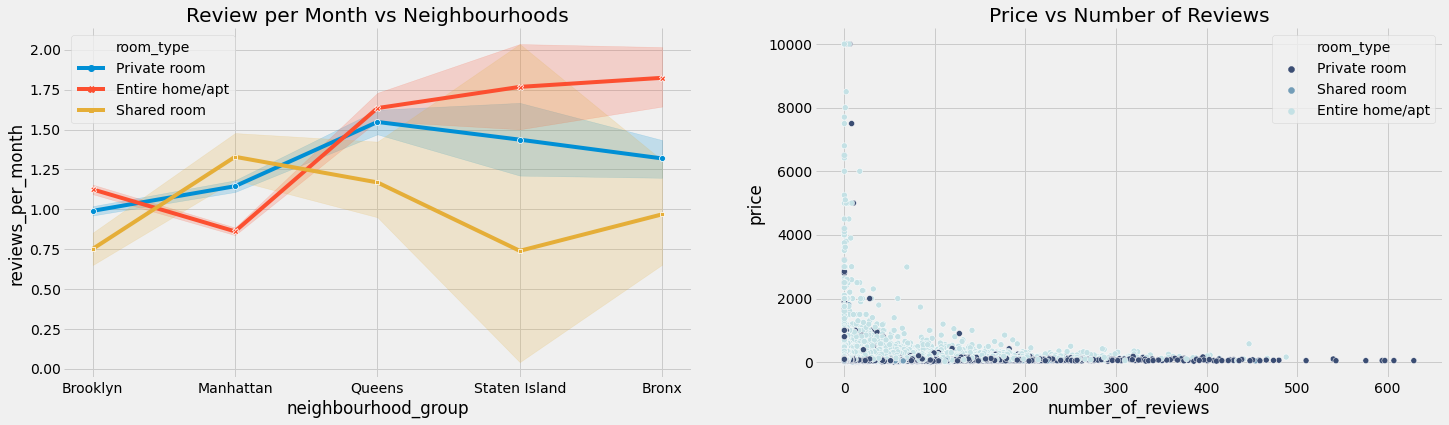

In [76]:
# Chart - 7 visualization code
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax = axes.flatten()

sns.lineplot(data=df, x='neighbourhood_group', y='reviews_per_month', hue='room_type', style="room_type",
        markers=True, dashes=False, ax=ax[0])
ax[0].set_title('Review per Month vs Neighbourhoods')
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='room_type', palette="ch:r=-.2,d=.3_r",
        hue_order=['Private room', 'Shared room', 'Entire home/apt'], ax=ax[1])
ax[1].set_title('Price vs Number of Reviews')
sns.despine(fig, left=True)


##### 1. Why did you pick the specific chart?

Answer Here: -
#####Line Plots display numerical values on one axis, and categorical values on the other. They can typically be used in much the same way Bar Plots can be used, though, they're more commonly used to keep track of changes over time

##### 2. What is/are the insight(s) found from the chart?

Answer Here: -
#####Brooklyn and Manhattan stands pretty fall in terms of review rate per month. Also, we can notice a negative relation between price & no. of reviews. Where, costlier properties has significantly less no of reviews, but cheaper properties have large number of reviews. Usually, cheaper rooms has more number of guest visits than costlier one, we know no of reviews is directly proportional to no of guests.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: -
#####It is best to use a line plot when comparing fewer than 25 numbers. It is a quick, simple way to organize data. Here x and y refers to the datapoints.The more number of reviews are given on the minimum prices and mostly prefer hotels on less price.

#### Chart - 8 (Multivariate analysis)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


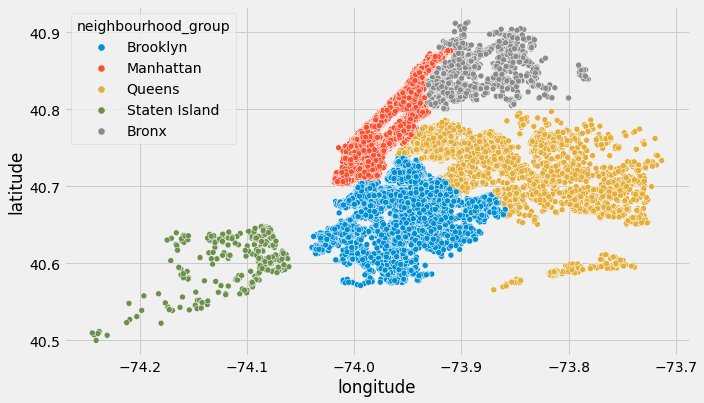

In [77]:
# Chart - 8 visualization code
plt.figure(figsize=(10,6))
sns.scatterplot(new_df.longitude,new_df.latitude,hue=new_df.neighbourhood_group)
plt.ioff()

##### 1. Why did you pick the specific chart?

Answer Here; -
#####Scatter plots are used to observe relationship between variables and uses dots to represent the relationship between them.Scatter plots are widely used to represent relation among variables and how change in one affects the other. 

##### 2. What is/are the insight(s) found from the chart?

Answer Here: -
#####Latitude and longitude make up the grid system that helps us identify absolute, or exact, locations on the Earth's surface. You can use latitude and longitude to identify specific locations.  Here the colour regions are showing the different neighbourhood groups and each dots in a group are displaying the locations of the neighbourhood. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: -
#####From the latitude and longitude,one can find the the place or hotel easily using coordinates. Latitude and longitude are also helpful in identifying landmarks. Hence one can find the neighbourhood easily using the latitude and longitude coordinates. 


#### Chart - 9 (Multivariate Analysis)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


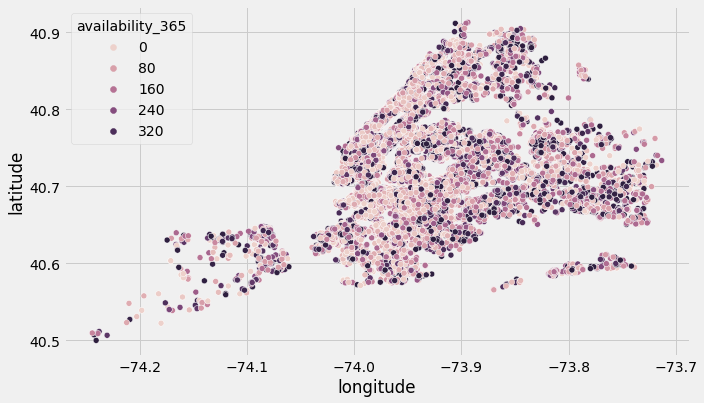

In [78]:
# Chart - 9 visualization code
plt.figure(figsize=(10,6))
sns.scatterplot(new_df.longitude,new_df.latitude,hue=new_df.availability_365)
plt.ioff()

##### 1. Why did you pick the specific chart?

Answer Here.
#####Scatter plots are used to observe relationship between variables and uses dots to represent the relationship between them.Scatter plots are widely used to represent relation among variables and how change in one affects the other. 
#####I pick this chart because it shows the availability of a hotel in a particular year and also it shows how many days it is opened out of 365 days.


##### 2. What is/are the insight(s) found from the chart?

Answer Here: -
#####Insight from this chart is, it clearly display wether the hotels are open or closed in more number in a year. So, availability_365 = 0 means that the listing is not available​ at all or in other words 0 days out of the year (365).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here: -
#####This insights will create the business impact because through the chart the colour dots are showing the status of the neighbourhood whether number of days in a year are open or close. Through this, the one who is looking to book a particular hotel can see the visulization and can book the hotel.  

#### Chart - 10 - Correlation Heatmap

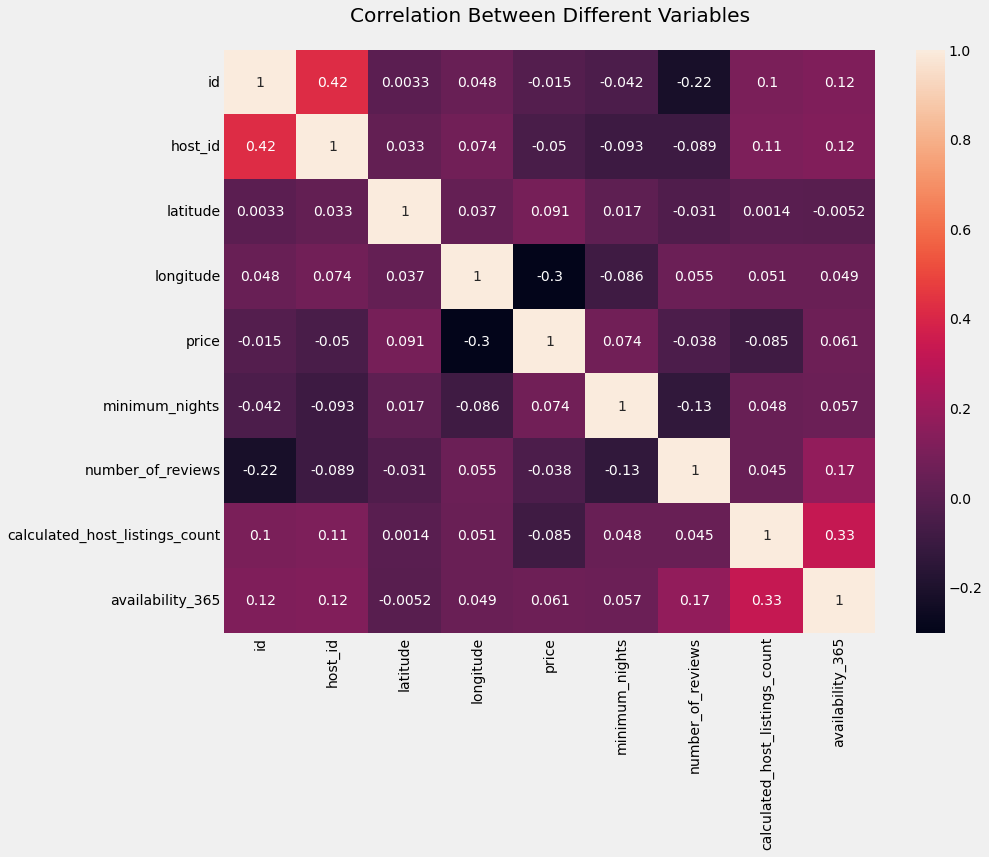

In [79]:
# Correlation Heatmap visualization code
corr = new_df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here: -
#####A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Answer Here: - 
##### The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. From the graph above, we know that there is not a strong correlation except review_per_month and number_of_review.Values closer to zero means there is no linear trend between the two variables.

#### Chart - 11 - Pair Plot 

In [80]:
# Pair Plot visualization code
#sns.pairplot(new_df, hue="price")

##### 1. Why did you pick the specific chart?

Answer Here: -
#####Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented.Here the rare most hotel books are of the high price i. e 8000 and 10000 and people mostly prefered the price range range till 2000


##### 2. What is/are the insight(s) found from the chart?

Answer Here: -
#####Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.Thus, I used pair plot to analyse the patterns of data and realationship between the features.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here: -
* By providing host protection insurance, as well as a rating and review system, the platform builds trust within the community of users and lowers transaction costs.
* Feel at home anywhere you go in the world
* Airbnb provides offers, promotional codes and credits to frequent travelers, as well as to hosts
* Periodically throw Offers to retain customers.
*	Be proactive with communication.
*	Ask for feedback often.
*	Look at the customers facing problem.
*	Lean into  best customers. 
*	Regular Service Maintenance.
* For every booking Airbnb charges the guest 6-12% of the booking fee. Moreover Airbnb charges the host 3% for every successful transaction.
*	Define a roadmap for new customers.
*	Stay competitive.


# **Conclusion**

So, this AirBNB dataset is a rich in data but not on features. From the entire above analysis we can conclude that,

1. The people who prefer to stay in Entire home or  Apartment they are going to stay bit longer in that particular Neighbourhood only.
2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
3. Most people prefer to pay less price.
4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
5. If people are not staying more then one night means they are travellers.
6. Most visitors don't prefer shared rooms, they tend to visit private room or entire home.
7. Manhattan and Brooklyn are the two distinguished, expensive & posh areas of NY.

#####We tried to put some light by performed the Extensive EDA for Airbnb dataset as allways there is no end to EDA this can be extended in n-dimenssions and lots and lots of conclusion can be drawn from EDA




### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***